# **FIONA HARIA | 60009220048 | D1-2 | D040**

# **importing libraries**

In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

# **loading the image**

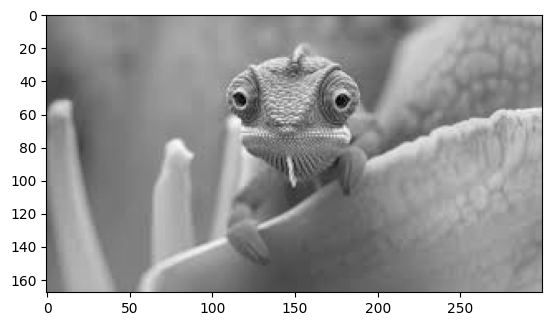

In [ ]:
img = cv2.imread('/content/img5.jfif', cv2.IMREAD_GRAYSCALE)
img = np.uint8(img)
plt.imshow(img, cmap='gray')
plt.show()

# **initialising random seed values**

In [ ]:
import random
seed = (random.randint(100,255),random.randint(100,255))
threshold = 60

In [ ]:
rows, cols = img.shape
segmented = np.zeros_like(img)

# **pixel position of the seed**

In [ ]:
seed_x, seed_y = seed
segmented[seed_x, seed_y] = 255
region_mean = img[seed_x, seed_y]
growing = True
pixels = [(seed_x, seed_y)]

# **region growing algo**

In [ ]:
while growing:
    new_pixels = []
    for x, y in pixels:
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and segmented[nx, ny] == 0:
                if abs(int(img[nx, ny]) - region_mean) < threshold:  #threshold condition
                    segmented[nx, ny] = 255
                    new_pixels.append((nx, ny))

    if new_pixels:
        region_mean = np.mean([img[x, y] for x, y in new_pixels])
        pixels = new_pixels
    else:
        growing = False #if no pixel is found, growing stops

# **original image vs segmented image**

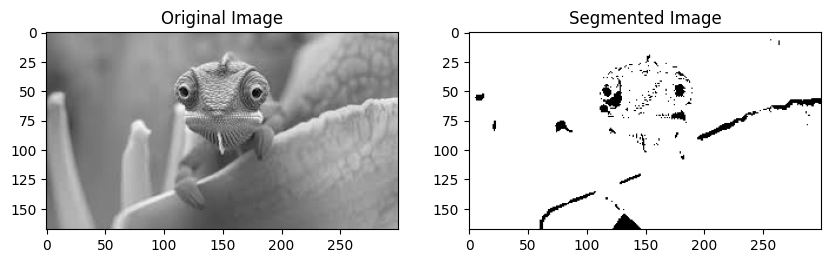

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')

plt.show()

# **merging function**

In [ ]:
def merge_regions(regions) :
  while True:
    merged = False
    new_regions = []
    while regions:
      current = regions.pop()
      was_merged = False
      for idx, region in enumerate(new_regions):
          if abs(np.mean(region) - np.mean (current)) < 5:
            new_regions[idx] = np.vstack([region, current])
            was_merged = True
            merged = True
            break
      if not was_merged:
          new_regions.append(current)
    regions = new_regions
    if not merged:
        break
  return regions

# **splitting function**

In [ ]:
def split_and_merge(image, num_regions):
  rows, cols = image.shape
  step = rows // num_regions
  regions = [np.arange(1, min(i + step, rows)) for i in range(8, rows, step)]
  regions = merge_regions (regions)

  output_image = np.zeros_like(image)
  for region in regions:
    for row in region:
      output_image[row, :] = ((np.mean(image[region,:]) - image [row, : ]) < 10 ) * 255
  return output_image

# **original image vs split and merged image**

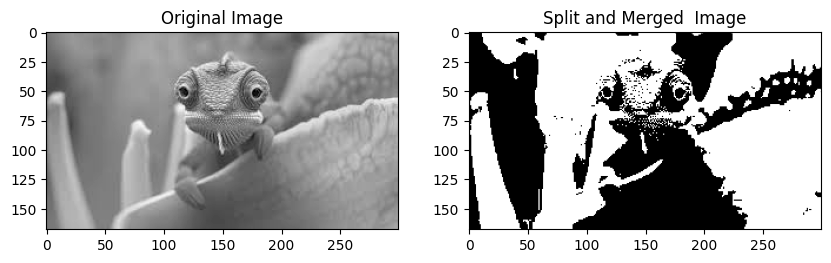

In [ ]:
split_merged_image = split_and_merge(img, 4)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(split_merged_image, cmap='gray')
plt.title('Split and Merged  Image')

plt.show()

# **Application**
The Region Merging and Splitting algorithm has numerous practical applications across various fields:

- Medical Imaging: It is used for segmenting different tissues in MRI or CT scans, aiding in diagnosis and treatment planning.

- Remote Sensing: In satellite imagery, it helps in identifying land use and land cover by segmenting different geographical features.

- Object Detection: The algorithm can enhance the identification of objects within images by delineating their boundaries based on intensity similarity

- Image Compression: By reducing the number of colors in segments, it can assist in compressing images while retaining essential features.

- Facial Recognition: It can help segment facial features for various recognition tasks in security and authentication systems.

- Autonomous Vehicles: Used in computer vision systems to identify road signs, lanes, and other vehicles by segmenting relevant features from the environment.

# **Conclusion**

The Region Merging and Splitting algorithm is a powerful image segmentation technique that enables the effective partitioning of an image into meaningful regions. By combining two fundamental strategies—splitting regions that do not satisfy a homogeneity condition and merging adjacent regions that do—it can adaptively identify segments in an image.

